In [3]:
#let's start with importing all the necessary libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading data or Data Extraction
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
#finding null
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#finding info about the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Since data has no null value and data type are continuous, we are good to proceed further 

In [8]:
# Statistical analysis of Data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Except 'free sulfur dioxide' and 'total sulfur dioxide' , other data looks somewhat balanced.
both of them has std is bit higher, but its just an observation, need to look further for details.


# Data Processing (Analysis (EDA))

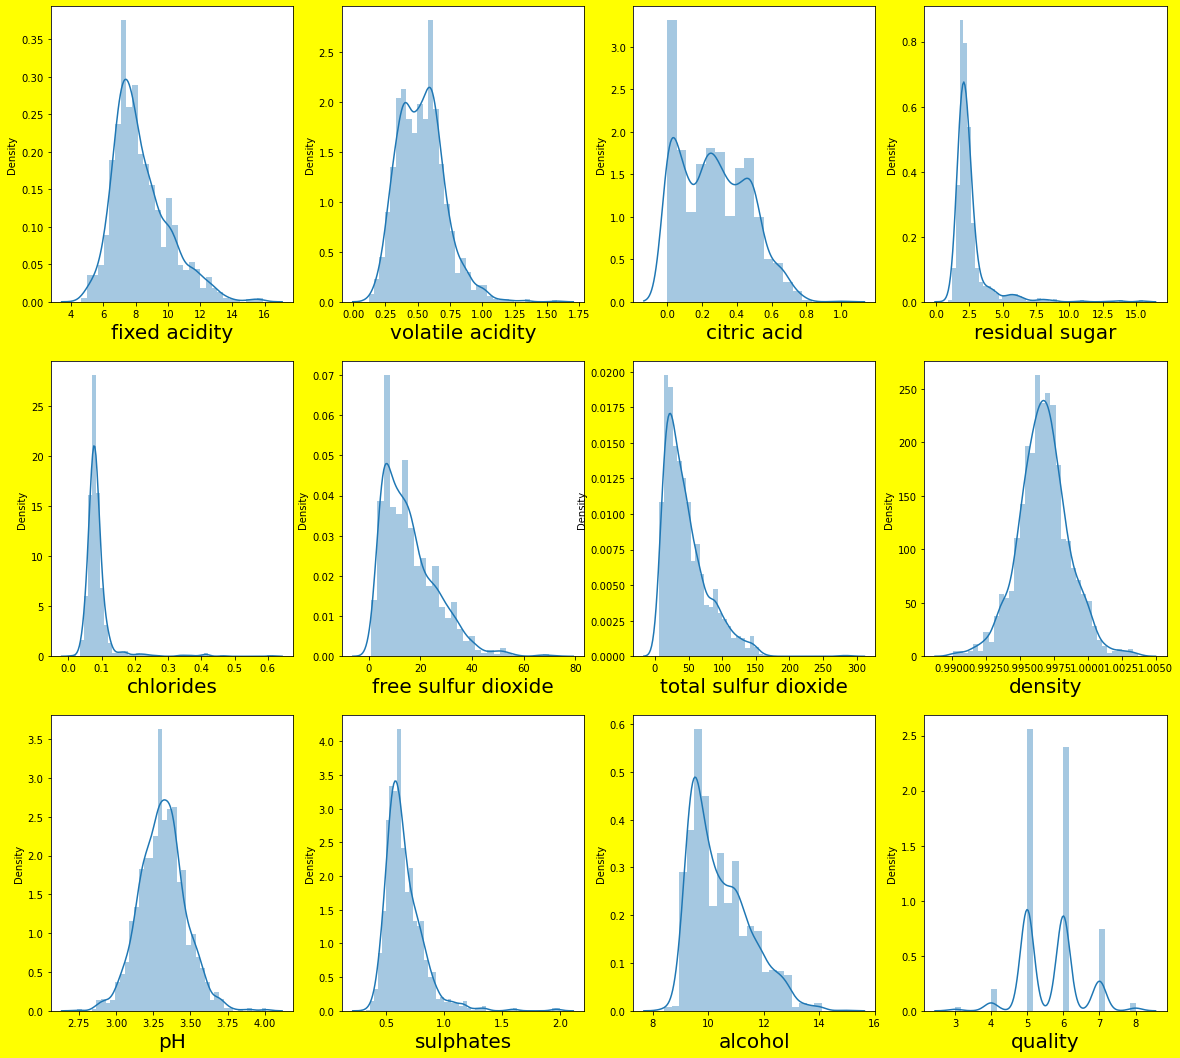

In [9]:
#let's see how our data is distributed for every coulmn

plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=12:                           #as there are 12 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

We can see some skewness in the data, we need to fix this. Besides this we can see zero's in citric acid, we need to fix that also. 
Also the output 'Quality' we can see some degrees there, which we need to sort into two category i.e classification data

In [10]:
df1=data
df1['citric acid']= df1['citric acid'].replace(0,df1['citric acid'].mean())
df1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#replacing zero values with the mean of the column i.e imputation using mean method(this method can only be applied on continuous data).

#data['citric acid']= data['citric acid'].replace(0,data['BMI'].mean())


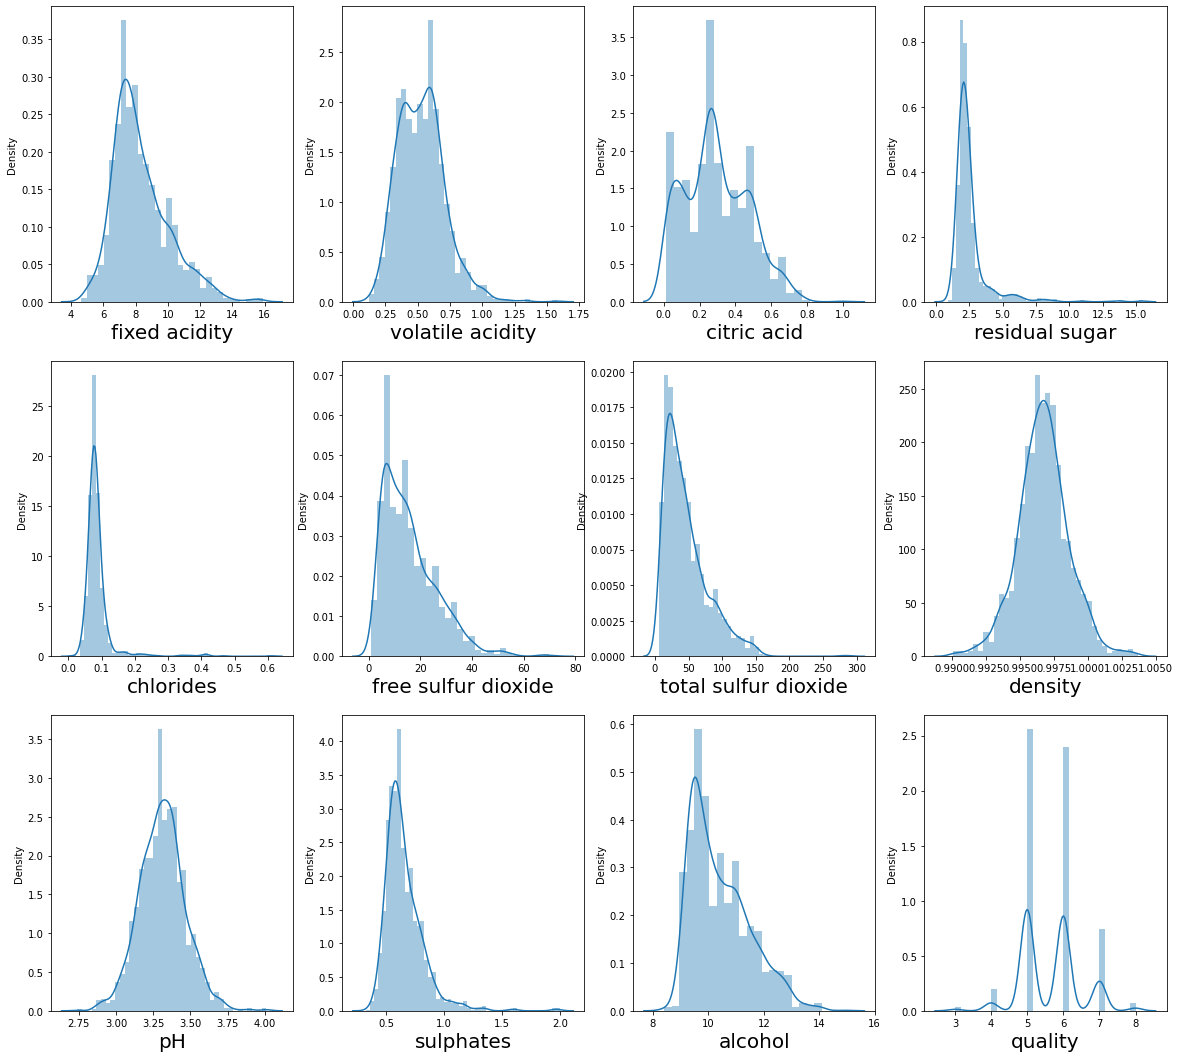

In [12]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25))
plotnumber=1

for column in df1:
    if plotnumber<=12:                           #as there are 12 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

There are no zero's now, but there are outliers lets deal with them.

In [13]:
df_features= df1.drop('quality', axis=1)


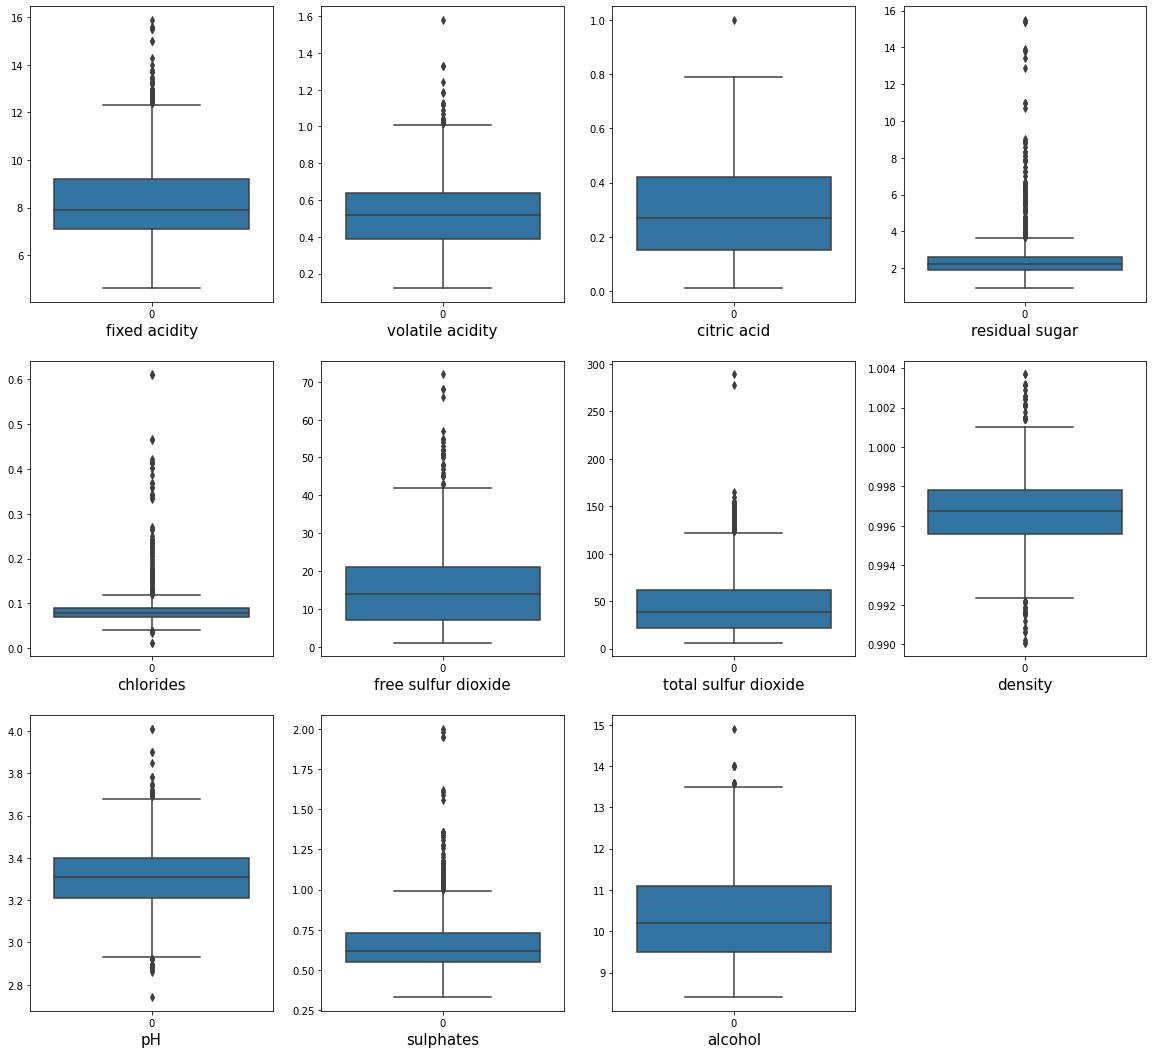

In [14]:
#Visualize the outliers using boxplot (Outlier cannot applied to categorical data, this technique can be done only in continuous data)

plt.figure(figsize=(20,25))
graph=1

for column in df_features:
    if graph<=12:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [15]:
df1.shape

(1599, 12)

In [16]:
# Find the IQR (inter quantile range) to identify outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor
#1st quantile
q1= df1.quantile(0.25)

#3rd quantile
q3= df1.quantile(0.75)

#IQR
iqr=q3- q1


Outlier detection Formula

higher side==> q3 + (1.5 * IQR) lower side ==> q1- (1.5 * IQR)

In [17]:
#validating one outlier
pH_high=(q3.pH + (1.5 * iqr.pH))
pH_high

3.6849999999999996

In [18]:
#check the indexes which have higher values
index= np.where(df1['pH'] > pH_high)
index

(array([  45,   94,   95,  268,  276,  553,  588,  695,  821,  930,  934,
         996,  997, 1111, 1270, 1300, 1316, 1321, 1377, 1488, 1491],
       dtype=int64),)

In [19]:
# Drop the index which we found in the above cell
df1= df1.drop(df1.index[index])
df1.shape

(1578, 12)

In [20]:
df1.reset_index()       # reseting the index

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1574,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1575,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1576,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
# before going further first find correlation so that we can cut shot the data columns

data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.642707,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.491586,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.642707,-0.491586,1.000000,0.130984,0.213140,-0.073963,-0.016469,0.345757,-0.477153,0.304037,0.134029,0.213425
residual sugar,0.114777,0.001918,0.130984,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.213140,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.073963,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,-0.016469,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.345757,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.477153,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.304037,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


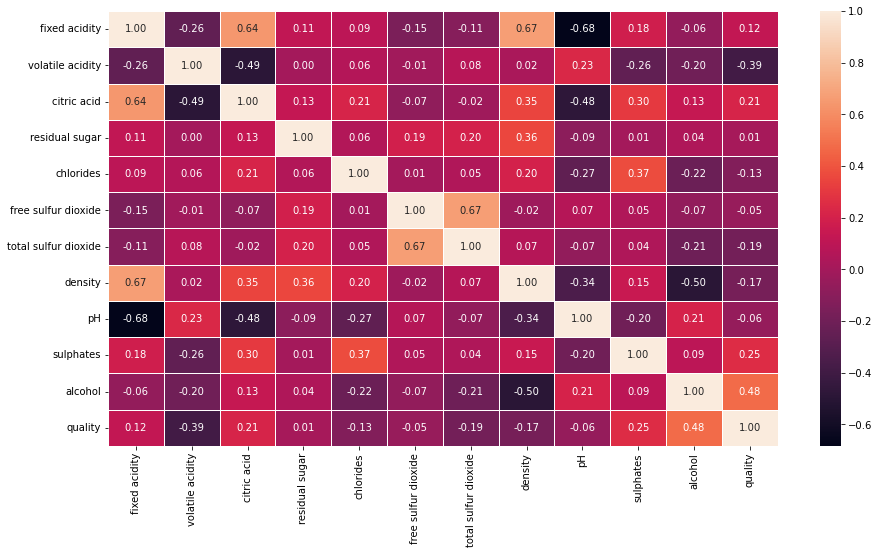

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f', linewidths=0.5)
plt.show()

It can be observed that free sulphur dioxide and total sulphur dioxide seems to have correlation, and residual sugar has least correlation with the quality of wine.

In [23]:
# Just to be sure, we can use SelectKBest method, to find out the correlation of features with output(wine quality)
# Before that we need to do arbitary cut off for the dependent variable, setting 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.


#Filtering
filtered_data = data['quality'] >= 7
data[filtered_data]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.270976,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.020000,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.560000,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.280000,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.160000,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.290000,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.430000,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.300000,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.170000,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [24]:
#List comprehension attribute for quality

data["wine_quality"] = ["Good" if i>=7 else "Not Good" for i in data.quality]
data.columns #We'll see Family_Situtation is in our columns right now!
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Not Good
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Not Good
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Not Good
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Not Good
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Not Good


In [25]:
#Use a filter to see the Not Good wine_quality
filtered_data = data.wine_quality =="Not Good"
data[filtered_data]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Not Good
1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Not Good
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Not Good
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Not Good
4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Not Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Not Good
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Not Good
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Not Good
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Not Good


In [26]:
#lets drop quality in the dataset, as we can now use wine_quality as output
data=data.drop(['quality'], axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good


In [27]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality'],
      dtype='object')

# Now lets use SelectKbest feature selection method
#SelectKBest use f_classif function to find best feauture, where, f_classif uses ANOVA test



In [28]:
from sklearn.feature_selection import SelectKBest, f_classif

In [29]:
# replace label column (diagnosis) into binary codes
data['wine_quality']= data['wine_quality'].replace({'Good':1, 'Not Good':0})


In [30]:
X=data.drop('wine_quality', axis =1)
y=data.wine_quality

In [31]:
best_features= SelectKBest(score_func=f_classif, k=9)
fit= best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores=pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns=['Feature_Name', 'Score']  # name output columns

print(feature_scores.nlargest(9, 'Score'))   #print 9 best features

            Feature_Name       Score
10               alcohol  317.650903
1       volatile acidity  126.290916
2            citric acid   72.516622
9              sulphates   66.185378
7                density   36.990465
6   total sulfur dioxide   31.702481
0          fixed acidity   23.356885
4              chlorides   15.266188
5    free sulfur dioxide    8.263373


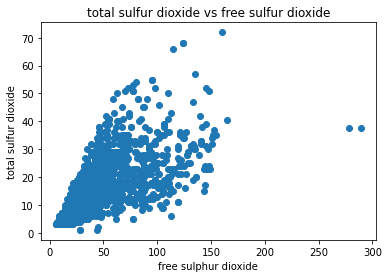

In [32]:
# checking for correlation between total sulfur dioxide and free sulphur dioxide
plt.scatter((data['total sulfur dioxide']), data['free sulfur dioxide'])
plt.ylabel('total sulfur dioxide')
plt.xlabel('free sulphur dioxide')
plt.title('total sulfur dioxide vs free sulfur dioxide')
plt.show()

from here we can say that total sulfur dioxide and free sulphur dioxide are positively corelated. i.e. if value of one increases value of other also increases. In order to avoid multicolinearity we can drop one of them.
From SelectKBest we can say that it is safe to drop 'free sulfur dioxide'.
As we are droping 'free sulfur dioxide', we can also drop pH column as its SelectKBest score is even lower.


# Model Building
In the model building we will be using the best features only. 



In [33]:
new_X=data[['alcohol','volatile acidity','citric acid','sulphates','density', 'total sulfur dioxide','fixed acidity','chlorides']]

In [34]:
new_X

,alcohol,volatile acidity,citric acid,sulphates,density,total sulfur dioxide,fixed acidity,chlorides
0,9.4,0.700,0.270976,0.56,0.99780,34.0,7.4,0.076
1,9.8,0.880,0.270976,0.68,0.99680,67.0,7.8,0.098
2,9.8,0.760,0.040000,0.65,0.99700,54.0,7.8,0.092
3,9.8,0.280,0.560000,0.58,0.99800,60.0,11.2,0.075
4,9.4,0.700,0.270976,0.56,0.99780,34.0,7.4,0.076
...,...,...,...,...,...,...,...,...
1594,10.5,0.600,0.080000,0.58,0.99490,44.0,6.2,0.090
1595,11.2,0.550,0.100000,0.76,0.99512,51.0,5.9,0.062
1596,11.0,0.510,0.130000,0.75,0.99574,40.0,6.3,0.076
1597,10.2,0.645,0.120000,0.71,0.99547,44.0,5.9,0.075


In [35]:
scalar=StandardScaler()

In [36]:
X_scalar=scalar.fit_transform(new_X)

In [37]:
from time import time
from sklearn.neighbors import KNeighborsClassifier


#Building model to test unexposed data

x_train,x_test,y_train,y_test = train_test_split(X_scalar,y,test_size=0.25, random_state=355)

knn=KNeighborsClassifier()

#checking training and testing time(Lazy Learner)
start =time()
knn.fit(x_train,y_train)
print("Knn training time : ", (time() - start))

start=time()
y_pred= knn.predict(x_test)
print("Knn test time    : ",(time() - start))

Knn training time :  0.19231605529785156
Knn test time    :  0.04683995246887207


In [38]:
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[333,  21],
       [ 27,  19]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       354
           1       0.47      0.41      0.44        46

    accuracy                           0.88       400
   macro avg       0.70      0.68      0.69       400
weighted avg       0.87      0.88      0.88       400



# DecisionTree classifier model

In [40]:

clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
clf.score(x_train,y_train)     #this is training score

1.0

In [42]:
y_pred = clf.predict(x_test)

#check the accuracy
accuracy_score(y_test, y_pred)

0.8925

In [70]:
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[346,   8],
       [ 30,  16]], dtype=int64)

# Cross validation

In [43]:
from sklearn.model_selection import cross_val_score


In [44]:
# Cross validation score to check if the model is overfitting

cross_val_score(knn, X_scalar, y, cv=10)

array([0.88125   , 0.89375   , 0.83125   , 0.83125   , 0.9125    ,
       0.8875    , 0.81875   , 0.86875   , 0.8875    , 0.86792453])

In [45]:
cross_val_score(KNeighborsClassifier(),X_scalar, y, cv=9).mean()

0.8711532900258858

In [46]:
#cross validation for decison tree
cross_val_score(clf, X_scalar, y, cv=10).mean()

0.8342492138364781

# Hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
#determining what algorithm and parameter works better.
param_grid = {'algorithm' : ['kd_tree', 'brute'],
             'leaf_size': [3,5,6,7,8],
             'n_neighbors': [3,5,7,9,11,13]}

In [49]:
#for KNeighboursClassifier
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [50]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [51]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [52]:
#we will use the best parameters in our knn algorithm and check if accuracy is increasing .
knn= KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [54]:
y_pred= knn.predict(x_test)

In [55]:
cfm=confusion_matrix(y_test, y_pred)
cfm

array([[340,  14],
       [ 29,  17]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       354
           1       0.55      0.37      0.44        46

    accuracy                           0.89       400
   macro avg       0.73      0.67      0.69       400
weighted avg       0.88      0.89      0.88       400



Hyperparameter tuning for Decision Tree

In [57]:
# Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
# we are tuning four important hyperparameters right now, we are passing the different values for both parameters 

grid_param={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10,15),             # the maximum depth of tree
    'max_leaf_nodes': range(2,10),
    'min_samples_leaf': range(2,10)    # maximum number of samples required to split at leaf node. 
}

In [58]:
grid_search= GridSearchCV(estimator= clf,param_grid=grid_param,
                          cv=5,n_jobs=-1) #Use all the cores in your system. for performance improvement

In [59]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_leaf': range(2, 10)})

In [60]:
best_parameters= grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2}


In [61]:
clf=DecisionTreeClassifier(criterion='gini',min_samples_leaf=2, max_depth=10,max_leaf_nodes=9)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2)

In [62]:
y_pred= clf.predict(x_test)

#check accuracy
accuracy_score(y_test,y_pred)

0.895

# Logistic Regression


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR= LogisticRegression()
LR.fit(x_train, y_train)
y_pred= LR.predict(x_test)
print("Accuracy ", accuracy_score(y_test, y_pred)*100) # testing accuracy
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  87.75
[[333  21]
 [ 28  18]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       354
           1       0.46      0.39      0.42        46

    accuracy                           0.88       400
   macro avg       0.69      0.67      0.68       400
weighted avg       0.87      0.88      0.87       400



In [67]:
#Cross validation:

from sklearn.model_selection import cross_val_score

#validation accuracy
scr= cross_val_score(LR,X_scalar,y, cv=10)
print("Cross validation score for Logistic Regression model : ",scr.mean())

Cross validation score for Logistic Regression model :  0.8711792452830188


# Ensemble Technique

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test, y_pred)*100) # testing accuracy
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  92.25
[[341  13]
 [ 18  28]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       354
           1       0.68      0.61      0.64        46

    accuracy                           0.92       400
   macro avg       0.82      0.79      0.80       400
weighted avg       0.92      0.92      0.92       400



In [68]:
#Cross validation:

from sklearn.model_selection import cross_val_score

#validation accuracy
scr= cross_val_score(rf,X_scalar,y, cv=10)
print("Cross validation score for RandomForestClassifier model : ",scr.mean())

Cross validation score for Logistic Regression model :  0.8705463836477987


In [71]:
#Hyper Parameter Tuning in randomForestClassifier:
RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

# creating parameter list to pass in GridSearchCV
parameters= {'max_features': ['auto','sqrt', 'log2'],
            'max_depth': [4,5,6,7,8],
            'criterion' : ['gini', 'entropy']}

In [72]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train,y_train)  #fitting the data model
GCV.best_params_   # printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [73]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [74]:
GCV_pred=GCV.best_estimator_.predict(x_test)  # predicting with best parameters
accuracy_score(y_test,GCV_pred)   # checking the final accuracy

0.9125

# SVC

In [65]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)

y_pred= svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test, y_pred)*100) # testing accuracy
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  90.5
[[346   8]
 [ 30  16]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       354
           1       0.67      0.35      0.46        46

    accuracy                           0.91       400
   macro avg       0.79      0.66      0.70       400
weighted avg       0.89      0.91      0.89       400



In [69]:
#cross validation for SVC
scr= cross_val_score(svc,X_scalar,y, cv=9)
print("Cross validation score for SVC model : ",scr.mean())

Cross validation score for SVC model :  0.8818108720032164


From above Models, randomForestClassifier fits best .
# ROC AUC Plot

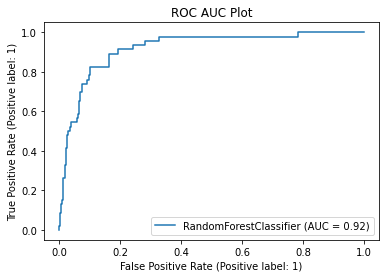

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

Finally the accuracy score of 92.25% and auc score of 92% is pretty decent. We can finalise our Model.

# Saving the model in pickle format

In [76]:
#PICKELING of FILE OR SERIALIZATION OF A FILE

import joblib
joblib.dump(GCV.best_estimator_, "wine.pkl")

['wine.pkl']